In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Overall Data Exploration

> ## 1.1) Data Loading

In [3]:
df = pd.read_excel(r'C:\GeekforGeeks\Data_Anaylsis\Python\Project\Flight_Project\data-unrefined\flight_price.xlsx')

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


> ## 1.2) Describing the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


> ## 1.3) Checking Null Values

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(subset = ['Route','Total_Stops'], inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# 2. Column Wise Analysis

> ## 2.1) Airline

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [12]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

> ## 2.2) Date of Journey

In [13]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [14]:
df['Day'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year'] = df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [16]:
a = []

for i in df['Date_of_Journey']:
    a.append(i.split('/')[0])

In [17]:
del df['Date_of_Journey']

In [18]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


> ## 2.3) Source and Destination

In [19]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [20]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [21]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [22]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month',
       'Year'],
      dtype='object')

In [23]:
del df['Route']

In [24]:
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


> ## 2.4) Departure and Arrival Time

In [25]:
df['Dep_HRS'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_MIN'] = df['Dep_Time'].str.split(':').str[1].astype(int)

In [26]:
del df['Dep_Time']

In [27]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_HRS,Dep_MIN
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30


In [28]:
df['Arrival_HRS'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0].astype(int)
df['Arrival_MIN'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1].astype(int)

In [29]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_MIN
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [30]:
del df['Arrival_Time']

In [31]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_MIN
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


> ## 2.5) Duration

In [32]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [33]:
df[df['Duration'] == '5m']['Duration'] = df[df['Duration'] == '5m']['Duration'].replace('5m','0h 5m')

C:\Users\Jasmeet singh\AppData\Local\Temp\ipykernel_5812\1352724655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Duration'] == '5m']['Duration'] = df[df['Duration'] == '5m']['Duration'].replace('5m','0h 5m')


In [34]:
df.loc[df['Duration'] == '5m', 'Duration'] = df.loc[df['Duration'] == '5m', 'Duration'].replace('5m', '0h 5m')

In [35]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [36]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_MIN
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [37]:
df['DH'] = df['Duration'].str.split().str[0].str.split('h').str[0].astype(int) * 60


In [38]:
df['DM'] = df['Duration'].str.split().str[1].str.split('m').str[0].fillna(0).astype(int)

In [39]:
df['Duration_in_mins'] = df['DH'] + df['DM']

In [40]:
del df['Duration']
del df['DH']
del df['DM']

In [41]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_MIN,Duration_in_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,19,55,22,25,150
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,11,30,14,10,160


> ## 2.6) Airline Stops and Additional Information

In [42]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [43]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# 3. Exploratory Data Analysis (EDA)

> ## 3.1) Flight Price Distribution 

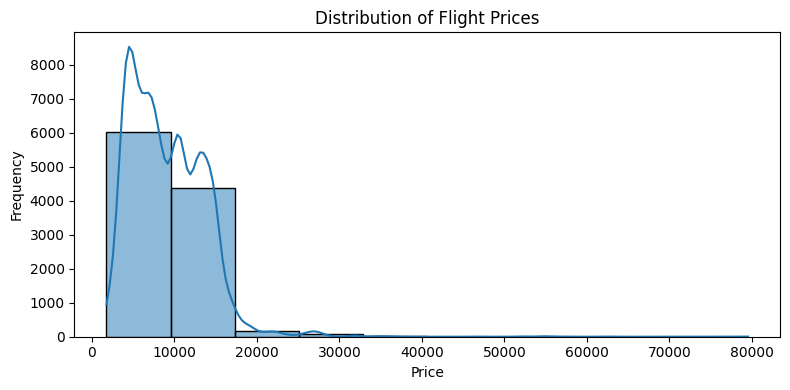

In [44]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=10, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Distribution_Flight-Price.png')
plt.show()

In [45]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1
print(f"Most fares cluster between ₹{q1:.0f} and ₹{q3:.0f}.")

Most fares cluster between ₹5277 and ₹12373.


> ## 3.2) Average Flight Price by Airline

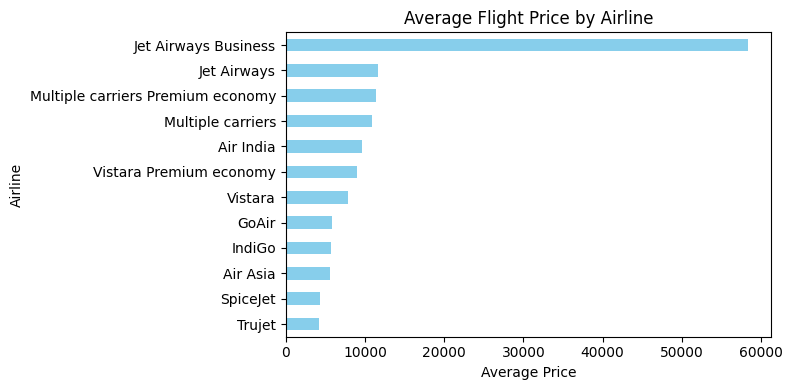

In [46]:
plt.figure(figsize=(8,4))
mean_price_airline = df.groupby('Airline')['Price'].mean().sort_values()
mean_price_airline.plot(kind='barh', color='skyblue')
plt.title('Average Flight Price by Airline')
plt.xlabel('Average Price')
plt.tight_layout()
plt.savefig('Flight_Price_by_Average.png')
plt.show()


> ## 3.3) Flight Volume by City Pair

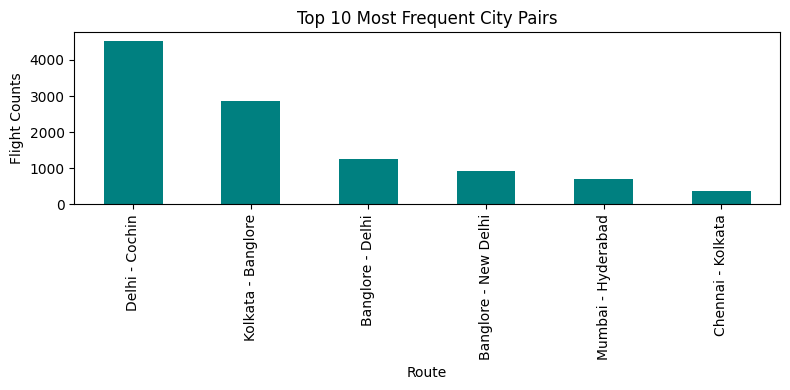

In [47]:
df['Route'] = df['Source'] + ' - ' + df['Destination']
route_counts = df['Route'].value_counts().head(10)
plt.figure(figsize=(8,4))
route_counts.plot(kind='bar', color='teal')
plt.title('Top 10 Most Frequent City Pairs')
plt.ylabel('Flight Counts')
plt.tight_layout()
plt.savefig('Frequent_City_Pairs')
plt.show()


> ## 3.4) Impact of Total Stops on Flight Price

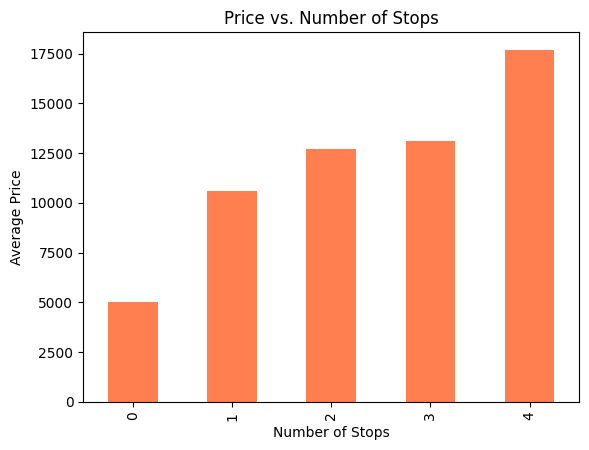

In [48]:
stop_map = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['Total_Stops_Numeric'] = df['Total_Stops'].map(stop_map)
stops_price = df.groupby('Total_Stops_Numeric')['Price'].mean()
stops_price.plot(kind='bar', color='coral')
plt.title('Price vs. Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price')
plt.savefig('Price_by_Stops')
plt.show()



> ## 3.5) Average Price by Route Length

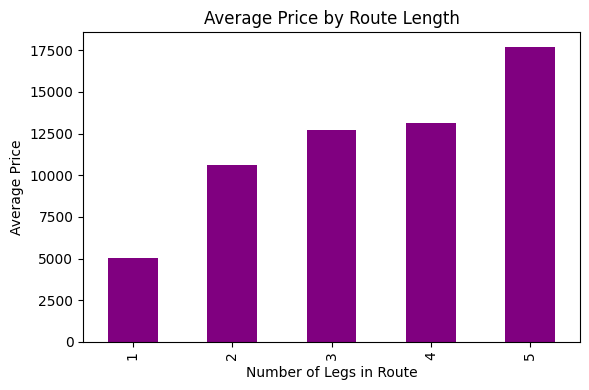

In [49]:
stops_map = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['Stops_Num'] = df['Total_Stops'].map(stops_map)
df['Route_Length'] = df['Stops_Num'] + 1
plt.figure(figsize=(6,4))
df.groupby('Route_Length')['Price'].mean().plot(kind='bar', color='purple')
plt.title('Average Price by Route Length')
plt.xlabel('Number of Legs in Route')
plt.ylabel('Average Price')
plt.tight_layout()
plt.savefig('Average_Price_by_Route_lenght')
plt.show()


> ## 3.6) Price by Flight Duration Scatter

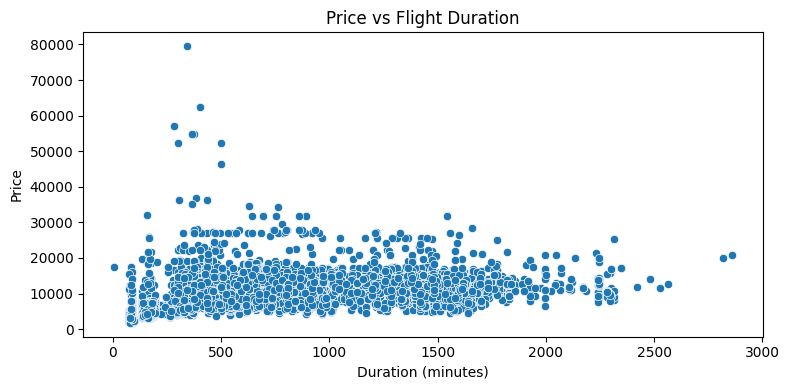

In [50]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Duration_in_mins', y='Price', data=df)
plt.title('Price vs Flight Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig('Price_vs_Flight_Duration')
plt.show()

> ## 3.7) Monthly Average Flight Prices

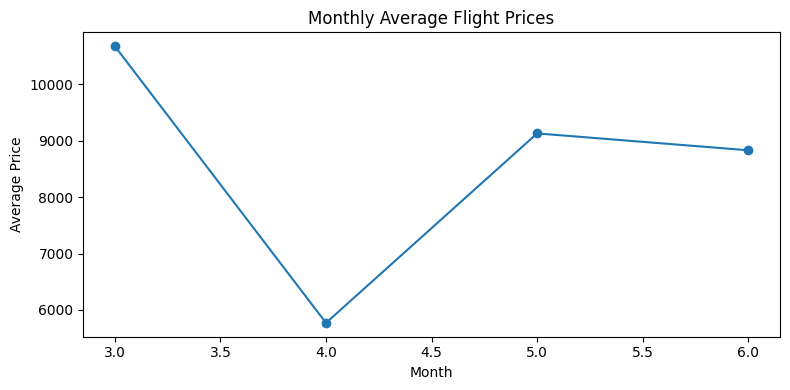

In [51]:
monthly_avg = df.groupby('Month')['Price'].mean()
plt.figure(figsize=(8,4))
monthly_avg.plot(marker='o')
plt.title('Monthly Average Flight Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.tight_layout()
plt.savefig('Monthly_Average_Flight_Price')
plt.show()

> ## 3.8) Prices by Airline

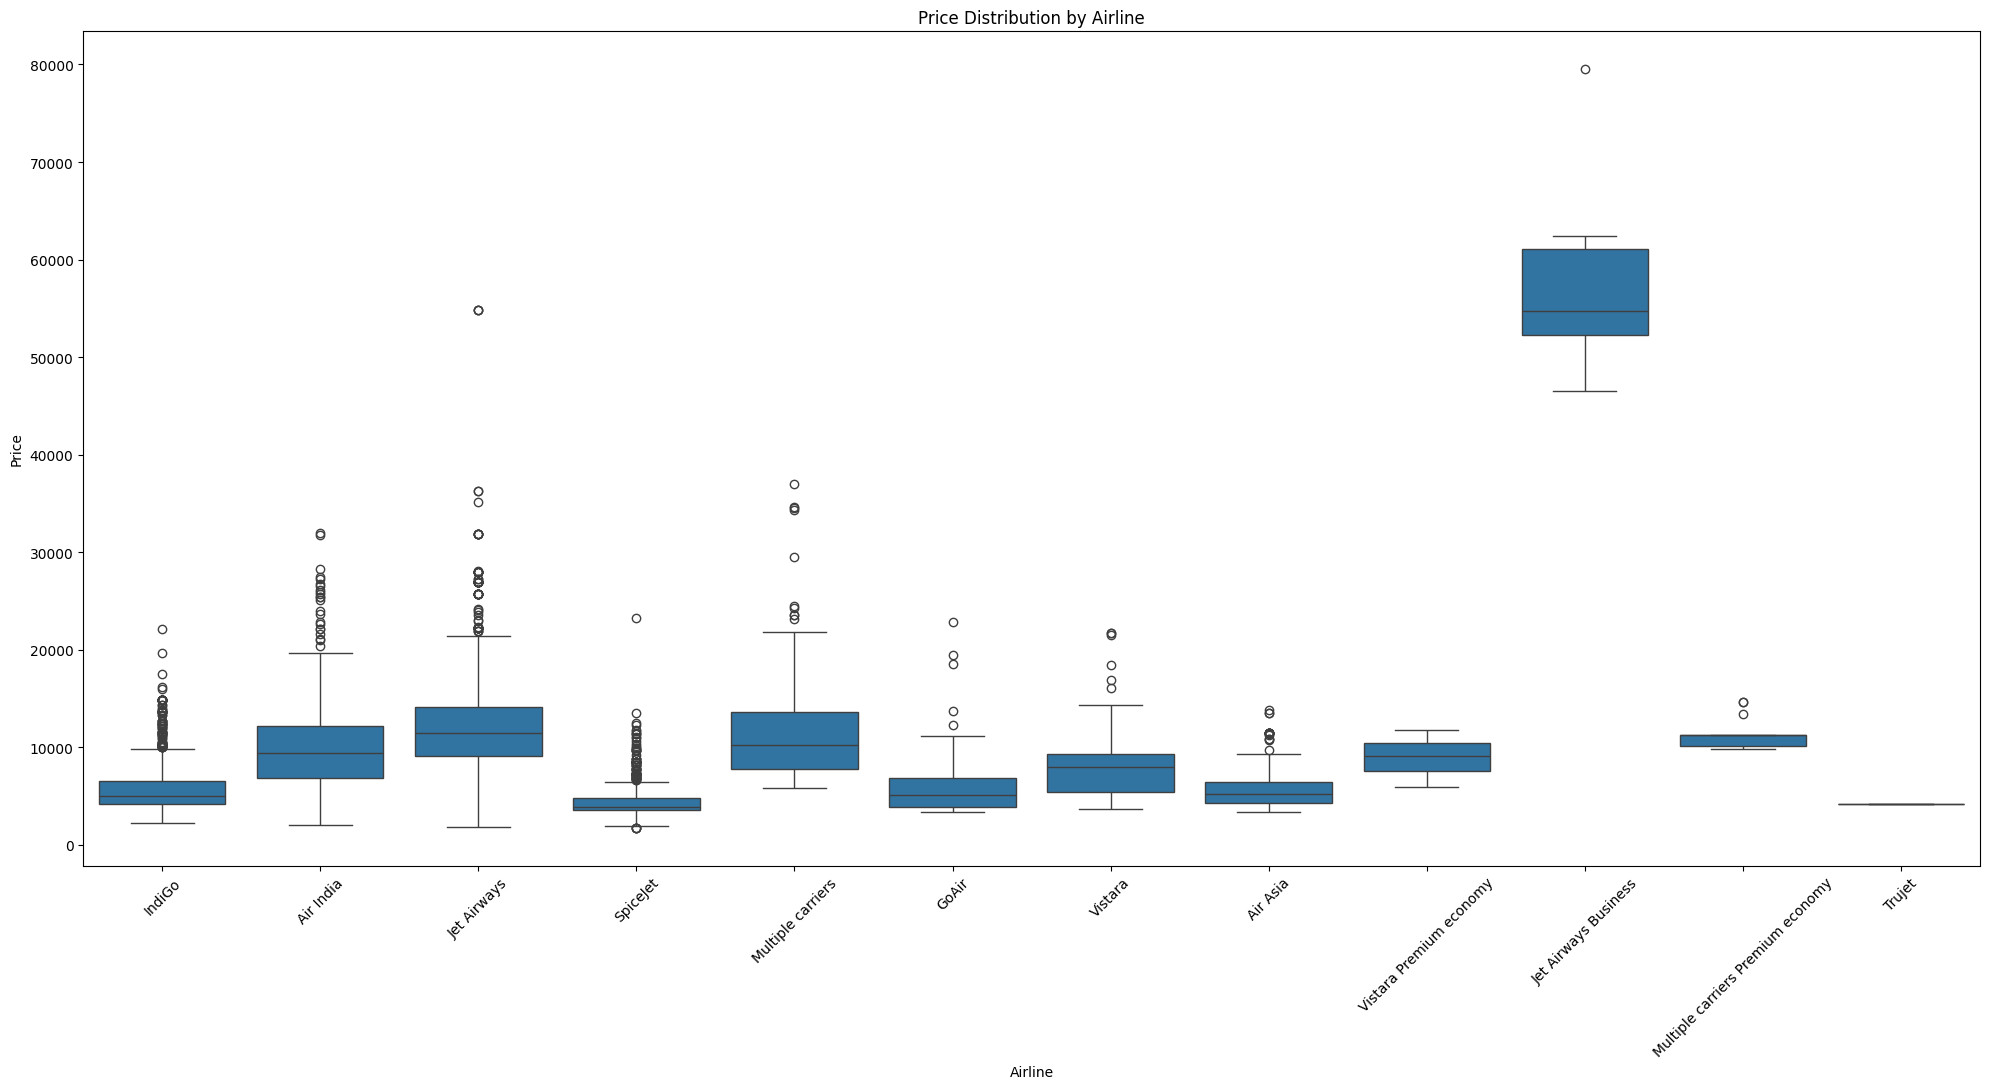

In [52]:
plt.figure(figsize=(20,11))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Price_by_Airline')
plt.show()

> ## 3.9) Departure Hour by Average Price

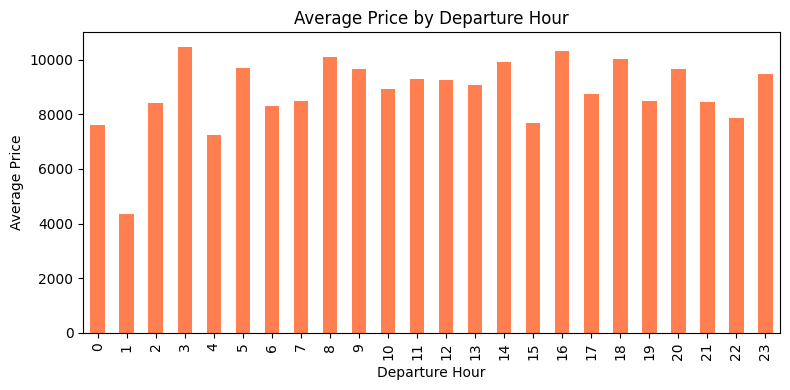

In [53]:
dep_avg = df.groupby('Dep_HRS')['Price'].mean()
plt.figure(figsize=(8,4))
dep_avg.plot(kind='bar', color='coral')
plt.title('Average Price by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Price')
plt.tight_layout()
plt.savefig('Departure_hour_by_Average_Price')
plt.show()

> ## 3.10) Correlation : Price, Duration, Stops

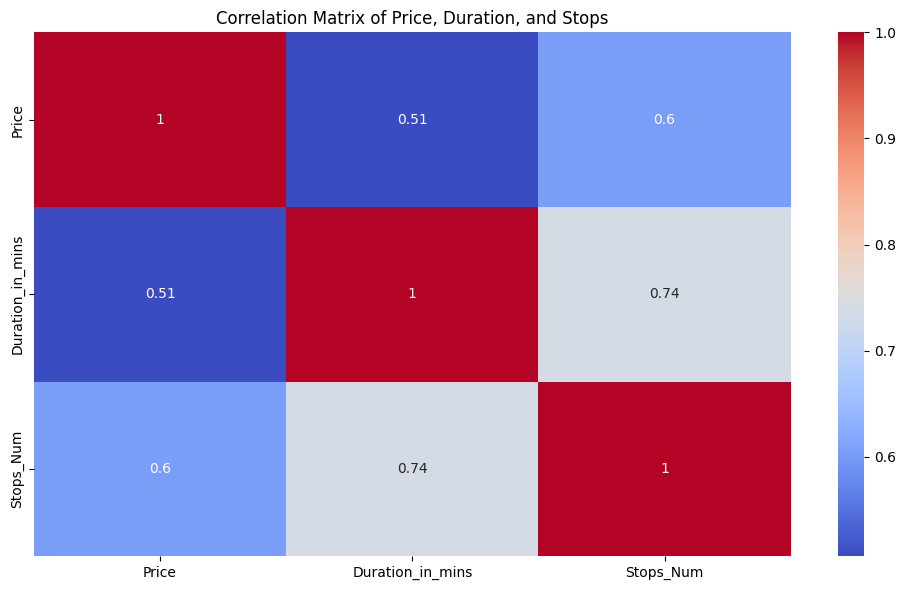

In [54]:
plt.figure(figsize=(10,6))
corr_matrix = df[['Price', 'Duration_in_mins', 'Stops_Num']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Price, Duration, and Stops')
plt.tight_layout()
plt.savefig('Correlation')
plt.show()

# 4. KPI

> ## 4.1) Overall Average Price

In [71]:
# Benchmark for pricing strategies
Avg_Price = df['Price'].mean()
print(f"Average Ticket Price: ₹{Avg_Price:.2f}")

Average Ticket Price: ₹9087.21


> ## 4.2) Highest Average Price Airline

In [72]:
avg_price_airline = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)

avg_price_airline = avg_price_airline.head(10)

Max_Avg_Price_Airline = mean_price_airline.idxmax()
print(f"Airline with Highest Avg. Price: {Max_Avg_Price_Airline}")

Airline with Highest Avg. Price: Jet Airways Business


> ## 4.3) Lowest Average Price Airline

In [73]:
Min_Avg_Price_Airline = mean_price_airline.idxmin()
print(f"Airline with Lowest Avg. Price: {Min_Avg_Price_Airline}")

Airline with Lowest Avg. Price: Trujet


> ## 4.4) Most Expensive City Pair

In [74]:
Most_Expensive_Route = df.groupby('Route')['Price'].mean().idxmax()
print(f"Most Expensive Route: {Most_Expensive_Route}")

Most Expensive Route: Banglore - New Delhi


> ## 4.5) Cheapest City Pair

In [75]:
Cheapest_Route = df.groupby('Route')['Price'].mean().idxmin()
print(f"Cheapest Route: {Cheapest_Route}")

Cheapest Route: Chennai - Kolkata


> ## 4.6) Average Price | Non-Stop Flight

In [76]:
Avg_Price_Non_Stop = df[df['Stops_Num'] == 0]['Price'].mean()
print(f"Avg. Price (Non-Stop Flights): ₹{Avg_Price_Non_Stop:.2f}")

Avg. Price (Non-Stop Flights): ₹5024.90


> ## 4.7) Average Price

In [78]:
Avg_Price_One_Plus_Stops = df[df['Stops_Num'] >= 1]['Price'].mean()
print(f"Avg. Price : ₹{Avg_Price_One_Plus_Stops:.2f}")

Avg. Price : ₹11059.34


> ## 4.8) Route with the Longest Average Duration

In [79]:
Longest_Avg_Duration_Route = df.groupby('Route')['Duration_in_mins'].mean().idxmax()
print(f"Route with Longest Avg. Duration: {Longest_Avg_Duration_Route}")

Route with Longest Avg. Duration: Delhi - Cochin


> ## 4.9) Price Outlier Percentage

In [66]:
# Calculate Q1 and Q3 for the Price column
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

# Compute the Interquartile Range (IQR)
iqr = q3 - q1

# Define outlier thresholds using the 1.5 * IQR rule
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers: prices below the lower bound or above the upper bound
outliers = (df['Price'] < lower_bound) | (df['Price'] > upper_bound)

# Calculate the percentage of outliers in the dataset
outlier_percentage = outliers.mean() * 100

# Display the result
print(f"Outlier percentage in 'Price' column: {outlier_percentage:.2f}%")

Outlier percentage in 'Price' column: 0.88%


> ## 4.10) Most Popular Route by Volume

In [80]:
Most_Popular_Route = df['Route'].value_counts().idxmax()
print(f"Most Popular Route: {Most_Popular_Route}")

Most Popular Route: Delhi - Cochin
